In [1]:
import pandas as pd
from keras.models import load_model
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
pdg_dict={'p':2212,'mu-':13, 'gamma':22, 'pi0':111,'pi+':211, 'e':11 }
from joblib import dump, load

Using TensorFlow backend.


In [2]:
import ast
import matplotlib.pyplot as plt
import ast
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
event_df = pd.read_csv('../RL data/hit pixels/vars_hit_pixels_1003nuance_CCRES_mu-_p_pi+.csv', index_col=0)
energy_event_df = pd.read_csv('../RL data/energy pixels/vars_energy_smeared_version_2_1003nuance_CCRES_mu-_p_pi+.csv', index_col=0)
#event_df2 = pd.read_csv('../RL data/hit pixels/vars_hit_pixels_1003nuance_CCRES_mu-_p_pi+.csv', index_col=0)
energy_event_df.head(2)

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,isTrueTrack,nuance,pdg,completeness,purity,energy,momentum,...,774,775,776,777,778,779,780,781,782,783
0,0,0,77588,1,1003,2212,0.995614,1.000000,1.170380,-0.417132 0.283818 0.484651,...,0.0,0.0,0.0,0.0,0.0,0.0,3.101747,63.038321,196.313195,105.698018
1,1,1,77589,1,1003,13,1.000000,0.995902,0.243355,-0.0621655 -0.192301 -0.0849337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [5]:
pixel_cols=[str(i) for i in range(28*28)]

In [4]:
model = load_model('track_shower_model.h5')
bdt_model=load('track_shower_decision_tree.joblib' )
e_gamma_model = load_model('electron_gamma_model.h5')
p_mu_pi_model=load_model('proton_muon_pion_model_3.h5')
#p_mu_pi_model=load_model('proton_muon_pion_model.h5')

In [6]:
def length(df):
    lengthList = []
    scaler = StandardScaler()
    df2 = df.copy(deep=True)
    x = [np.array(df['x'][i]) for i in range(len(df))]
    z = [np.array(df['z'][i]) for i in range(len(df))]
    for i in range(len(df)):
        print(i)
        #x[i] = scaler.fit_transform(np.array(ast.literal_eval(df2['x'][i])).reshape(-1,1))
        #z[i] = scaler.fit_transform(np.array(ast.literal_eval(df2['z'][i])).reshape(-1,1))
        x[i] = np.array(ast.literal_eval(df2['x'][i]))
        z[i] = np.array(ast.literal_eval(df2['z'][i]))
        data = [[x[i][j], z[i][j]] for j in range(len(x[i]))]
        data = np.array(data)
        data = data.reshape(data.shape[0],data.shape[1])
        pca = PCA(n_components=1)
        new_data = pca.fit_transform(data)
        length = float(max(new_data)- min(new_data))
        lengthList.append(length)
        print(length)
    return lengthList
length=length(energy_event_df)


0
29.76887475158996
1
25.953983117305192
2
29.086572057832093
3
60.441183676581524
4
10.508877202330531
5
7.814267354279134
6
72.6052546180689
7
77.88314909324214
8
1.88557830584641
9
33.05366511012138
10
41.468672387881
11
14.400005823350437
12
66.27124265169277
13
108.44670499830713
14
7.413070004171812
15
10.994089906529013
16
29.7886319610317
17
29.67577764287472
18
24.28360964283022
19
1.8731859542800302
20
7.561417285594128
21
275.040779653095
22
39.12225083292588
23
54.54403596254832
24
26.57777037527149
25
22.740912649028253
26
0.7341192653136411
27
393.0468015436202
28
25.48545438998564
29
64.57042194345874
30
52.94722059011837
31
2.4137916789378795
32
8.528436001007929
33
77.6928766719478
34
44.845369378680395
35
30.78039503380035
36
119.27197691533006
37
32.547677140081284
38
74.6919710342543
39
193.61717342243386
40
100.976419730358
41
0.9050736684729344
42
53.441319707036385
43
7.789191899834747
44
25.07562936292059
45
32.68941808238468
46
33.854287230716324
47
24.91392746

25.898172672636917
445
211.57226442369443
446
13.780366309344565
447
37.027766393282086
448
11.312492486057366
449
103.56320675132278
450
12.773781308868323
451
486.9408036296647
452
4.093541380870874
453
542.1775878788599
454
13.352987076698497
455
2.6103087661320905
456
118.62710346991301
457
29.37966000778796
458
6.304465101774348
459
26.006408231553046
460
20.33258436532772
461
31.798546303255076
462
148.66224177981059
463
25.76797240639444
464
5.158952644807535
465
156.9543179425032
466
71.49772669970325
467
41.498562716401125
468
74.10907295125418
469
64.66624747809473
470
11.840375093128456
471
140.9800339231668
472
33.05982879359662
473
2.3500849732354725
474
3.6608190431634204
475
31.04750539522729
476
2.400129930544094
477
76.73234197238213
478
10.57591074087393
479
11.42444808842379
480
273.152254036955
481
0.9100435047938129
482
3.652685499164329
483
58.62734554788996
484
2.9655435460806383
485
6.335092784458416
486
102.74416508001187
487
21.803727479159747
488
19.258754213

32.04069932570565
894
6.356280578800336
895
143.36755051338747
896
3.772508140064377
897
41.024638810699386
898
69.17871311059656
899
4.88172268471835
900
26.85974400506698
901
13.424225955887188
902
9.163547804319917
903
28.316938150787486
904
13.20695212976676
905
13.650422406651131
906
203.6907676083547
907
3.0580203081850255
908
106.69491509636217
909
266.09227303502723
910
49.91469835713252
911
49.120591995876524
912
22.308147783978747
913
19.37197984845908
914
7.141874794320313
915
2.1831834759341615
916
48.024126443107406
917
9.916938619921579
918
87.02586832601467
919
16.23383748832805
920
73.23645384378
921
68.16384416102665
922
8.362144202236784
923
2.670195705042367
924
26.209728732348566
925
5.406553124875991
926
12.426875363678139
927
128.35893951932994
928
15.76543160833382
929
8.057999177183905
930
135.19493115403208
931
2.4036052568537047
932
36.60520472269055
933
50.56041397367818
934
18.89953410030425
935
0.9437190413714829
936
36.04941913956476
937
77.20685069668532


1264
263.4655877484786
1265
54.397830364862585
1266
21.12506701317165
1267
11.763200042861406
1268
9.089418975730498
1269
87.34407638190856
1270
175.10751816977188
1271
44.31479918563766
1272
17.2274419529775
1273
118.11388006016358
1274
78.73339317008106
1275
43.27926678293664
1276
15.338031769741654
1277
7.134512250161094
1278
3.265045789512696
1279
203.07521010113086
1280
33.17217854068652
1281
54.29455720983809
1282
20.400463379710523
1283
9.877249400218105
1284
207.74358263122093
1285
31.796496977593186
1286
13.354010866336552
1287
4.1257970068658985
1288
7.553998506687019
1289
6.736078269456781
1290
28.183752910229316
1291
21.461081599898375
1292
6.566168847305793
1293
130.71378451758846
1294
12.914229437001186
1295
35.583791556748224
1296
13.273991314881261
1297
32.23860149051056
1298
19.767805550591014
1299
416.11098890071753
1300
5.022657244571198
1301
9.451989687455548
1302
39.4202516569799
1303
65.78359550424798
1304
39.15449296300737
1305
3.2369703989792247
1306
51.44904181

In [6]:
#energy_event_df['length']=length
#energy_event_df[pixel_cols]=energy_event_df[pixel_cols].div(energy_event_df.length, axis=0)
energy_event_df[pixel_cols].head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.000000,0.000000,0.000000,0.0,0.0,1.711373,68.749743,185.701772,40.630348,0.656694,...,0.0,0.0,0.0,0.0,0.0,0.0,3.101747,63.038321,196.313195,105.698018
1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,71.183717,4.731269,0.006412,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [7]:
event_test = (event_df[pixel_cols].values).astype('float32')
#energy_event_test = (event_df2[pixel_cols].values).astype('float32')

In [8]:
event_test=event_test/255.0
#energy_event_test=energy_event_test/255.0
event_test = event_test.reshape(event_test.shape[0], 28, 28,1)
#energy_event_test = energy_event_test.reshape(energy_event_test.shape[0], 28, 28,1)
#energy_event_test

In [9]:
# Predict the values from the validation dataset
y_pred = model.predict(event_test)
y_pred = np.argmax(y_pred, axis = 1) 
event_df['track_pred']=y_pred
event_df.head(2)

,Unnamed: 0.1,Unnamed: 0.1.1,isTrueTrack,nuance,pdg,completeness,purity,energy,momentum,vertex,...,775,776,777,778,779,780,781,782,783,track_pred
0,0,77588,1,1003,2212,0.995614,1.000000,1.170380,-0.417132 0.283818 0.484651,213.372 94.5945 628.466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,1
1,1,77589,1,1003,13,1.000000,0.995902,0.243355,-0.0621655 -0.192301 -0.0849337,213.372 94.5945 628.466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
tracks=['mu-', 'p', 'pi+']
showers=['e', 'gamma']

In [11]:
particles = ['mu-', 'p', 'pi+']
accuracy=[]
for pdg in particles:
    true = len(event_df[event_df.pdg==pdg_dict[pdg]])
    pred = len(event_df[(event_df.isTrueTrack==event_df.track_pred)][event_df.pdg==pdg_dict[pdg]])
    accuracy.append(pred/true)
print('CC_Nu_Mu nuance code:1004')
accuracy = [[i] for i in accuracy]
dictionary = dict(zip(particles, accuracy))
result = pd.DataFrame(data=dictionary)
result['prediction accuracy']= 'correct track/shower %'
result =result.set_index('prediction accuracy')
result=result*100
result

CC_Nu_Mu nuance code:1004


C:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,mu-,p,pi+
prediction accuracy,,,
correct track/shower %,96.448598,95.514019,84.11215


In [12]:
variables = ['eps','RSS', 'envelope', 'sliding', 'nHits']
y_pred = bdt_model.predict(event_df[variables])
#y_pred = np.argmax(y_pred, axis = 1) 
event_df['bdt_track_pred']=y_pred
event_df.head(2)

,Unnamed: 0.1,Unnamed: 0.1.1,isTrueTrack,nuance,pdg,completeness,purity,energy,momentum,vertex,...,776,777,778,779,780,781,782,783,track_pred,bdt_track_pred
0,0,77588,1,1003,2212,0.995614,1.000000,1.170380,-0.417132 0.283818 0.484651,213.372 94.5945 628.466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,1,1
1,1,77589,1,1003,13,1.000000,0.995902,0.243355,-0.0621655 -0.192301 -0.0849337,213.372 94.5945 628.466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [13]:
#particles = ['mu-', 'p', 'gamma']
accuracy=[]
for pdg in particles:
    true = len(event_df[event_df.pdg==pdg_dict[pdg]])
    pred = len(event_df[(event_df.isTrueTrack==event_df.bdt_track_pred)][event_df.pdg==pdg_dict[pdg]])
    accuracy.append(pred/true)
print('CC_Nu_Mu nuance code:1004')
accuracy = [[i] for i in accuracy]
dictionary = dict(zip(particles, accuracy))
result = pd.DataFrame(data=dictionary)
result['prediction accuracy']= 'correct track/shower %'
result =result.set_index('prediction accuracy')
result=result*100
result

CC_Nu_Mu nuance code:1004


C:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,mu-,p,pi+
prediction accuracy,,,
correct track/shower %,94.579439,94.205607,74.205607


In [14]:
images=(energy_event_df[pixel_cols].values).astype('float32')
images=images/255.0
images=images.reshape(images.shape[0],28,28,1)

In [15]:
event_df['e_gamma_pred']=np.argmax(e_gamma_model.predict(images), axis=1)
event_df['p_mu_pi_pred']=np.argmax(p_mu_pi_model.predict(images), axis=1)

In [16]:
event_df['e_gamma_pred']=np.where(event_df['e_gamma_pred']==1, 22,11)
event_df['p_mu_pi_pred']=np.where(event_df['p_mu_pi_pred']==0, 2212,np.where(event_df['p_mu_pi_pred']==1,13,211))

In [17]:
#particles = ['mu-', 'p', 'gamma']
accuracy=[]
for pdg in particles:
    true = len(event_df[event_df.pdg==pdg_dict[pdg]])
    #pred = len(event_df[(event_df.isTrueTrack==event_df.track_pred)][event_df.pdg==pdg_dict[pdg]])
    if pdg in tracks:
        pred=len(event_df[(event_df.pdg==pdg_dict[pdg])&(event_df.isTrueTrack==1) &(event_df.track_pred==1)& (event_df.p_mu_pi_pred==pdg_dict[pdg])])
    if pdg in showers:
        pred=len(event_df[(event_df.pdg==pdg_dict[pdg])&(event_df.isTrueTrack==0) &(event_df.track_pred==0)& (event_df.e_gamma_pred==pdg_dict[pdg])])
    accuracy.append(pred/true)
print('CC_Nu_Mu nuance code:1004')
accuracy = [[i] for i in accuracy]
dictionary = dict(zip(particles, accuracy))
result = pd.DataFrame(data=dictionary)
result['prediction accuracy']= 'correct particle %'
result =result.set_index('prediction accuracy')
result=result*100
result

CC_Nu_Mu nuance code:1004


,mu-,p,pi+
prediction accuracy,,,
correct particle %,59.065421,67.850467,56.074766


In [74]:
list(energy_event_df.index)==list(event_df.index)

True

In [75]:
pred_columns = ['track_pred', 'bdt_track_pred', 'e_gamma_pred', 'p_mu_pi_pred']
energy_event_df[pred_columns]=event_df[pred_columns]

In [76]:
viz_df=energy_event_df[(energy_event_df.pdg==211)& (energy_event_df.completeness>0.8) & (energy_event_df.purity>0.7)]
viz_df2=event_df[(event_df.pdg==211)& (event_df.completeness>0.8) & (event_df.purity>0.7)]

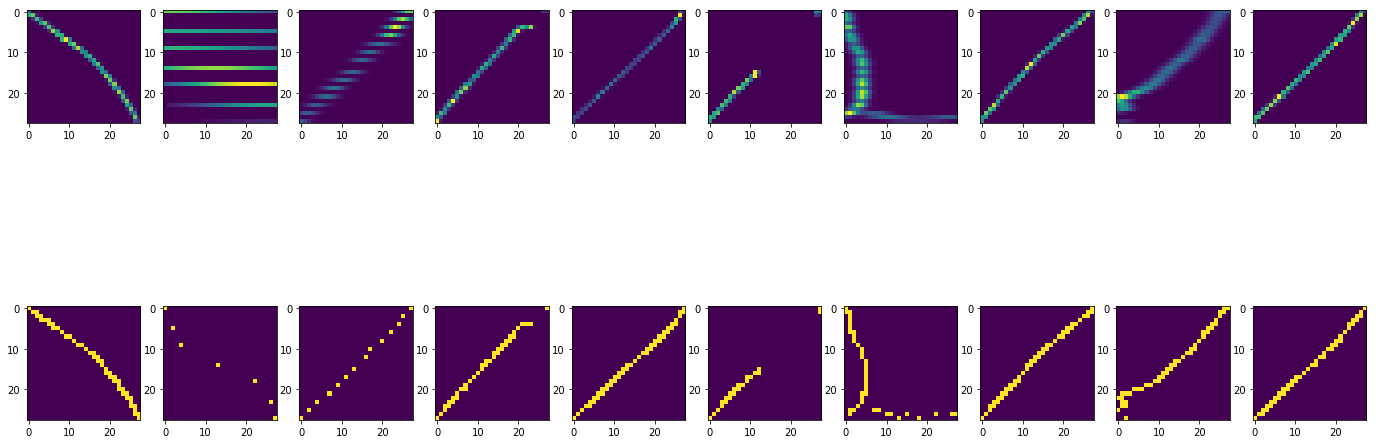

In [77]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(24,10))
x, y = 10, 2
count=1
for i in viz_df.index[0:x]:  
    plt.subplot(y, x, count)
    
    plt.imshow(viz_df[pixel_cols].values.astype('float32')[i].reshape((28,28)),interpolation='nearest')
    plt.subplot(y, x, count+x)
    plt.imshow(viz_df2[pixel_cols].values.astype('float32')[i].reshape((28,28)),vmin=0, vmax=255,interpolation='nearest')
    count+=1
plt.savefig('pion images.png')
plt.show()

In [78]:
len(df)

NameError: name 'df' is not defined

In [48]:
k=[[[200,200,200]], [[200,200,180]]]

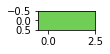

In [70]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
count=1
for i in range(1):  
    plt.subplot(y, x, count)
    count+=1
    plt.imshow(k[i],vmin=0, vmax=255, interpolation='nearest')
#plt.savefig('CNN Input images.eps')
plt.show()

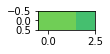

In [71]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
count=1
for i in range(1):  
    plt.subplot(y, x, count)
    count+=1
    plt.imshow(k[i+1],vmin=0, vmax=255, interpolation='nearest')
#plt.savefig('CNN Input images.eps')
plt.show()